<h1> ARIMA and FILL MISSING VALUE BY INTERPOLATION FUNCTION


[Source](https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
data = pd.read_csv("D:/vs_code_workspace/PYTHON/IoTpreThesis/irrelevant/feeds.csv")
data = data.rename({'created_at': 'date', 'field1': 'LPG', 'field2':'CO'}, axis=1) 
data = data.drop([ 'latitude', 'longitude',	'elevation', 'status'], 1)
data['date'] = data['date'].str[:-6]
data


C:\Users\User\AppData\Local\Temp/ipykernel_21084/1865991293.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop([ 'latitude', 'longitude',	'elevation', 'status'], 1)


,date,entry_id,LPG,CO
0,2022-01-15T14:19:47,2,1.53733,3.91446
1,2022-01-15T14:20:48,3,0.11203,2.96776
2,2022-01-15T14:21:25,4,0.06507,2.81215
3,2022-01-15T14:21:56,5,0.04862,2.73300
4,2022-01-15T14:23:00,6,0.04180,2.65287
...,...,...,...,...
398,2022-01-15T17:52:46,400,0.01838,2.53068
399,2022-01-15T17:53:15,401,0.02381,2.53068
400,2022-01-15T17:53:45,402,0.01682,2.53068
401,2022-01-15T17:54:14,403,0.01682,2.53068


In [58]:
for i in range(len(data['date'])):
  data['date'][i] = data['date'][i].replace("T", " ")

C:\Users\User\AppData\Local\Temp/ipykernel_21084/452808288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'][i] = data['date'][i].replace("T", " ")


In [59]:
from datetime import datetime, timedelta
date_format_str = '%Y-%m-%d %H:%M:%S'

In [60]:
length = len(data.date)-1

In [61]:
for i in range(length):
  start = datetime.strptime(data.date[i], date_format_str)
  end =   datetime.strptime(data.date[i+1], date_format_str)
  diff = end - start  
  if (diff.total_seconds() > 60):

    add = start + timedelta(seconds=10)
    add = add.strftime(date_format_str)
    line = pd.DataFrame({"date": add ,"LPG": float("NaN"), "CO": float("NaN"),}, index=[i+1])
    data = pd.concat([data.iloc[:i+1], line, data.iloc[i+1:]]).reset_index(drop=True)
    length += 1
    continue
    

In [62]:
data.index = data['date']
data.index.name = None
data

,date,entry_id,LPG,CO
2022-01-15 14:19:47,2022-01-15 14:19:47,2.0,1.53733,3.91446
2022-01-15 14:19:57,2022-01-15 14:19:57,NaN,NaN,NaN
2022-01-15 14:20:48,2022-01-15 14:20:48,3.0,0.11203,2.96776
2022-01-15 14:21:25,2022-01-15 14:21:25,4.0,0.06507,2.81215
2022-01-15 14:21:56,2022-01-15 14:21:56,5.0,0.04862,2.73300
...,...,...,...,...
2022-01-15 17:52:46,2022-01-15 17:52:46,400.0,0.01838,2.53068
2022-01-15 17:53:15,2022-01-15 17:53:15,401.0,0.02381,2.53068
2022-01-15 17:53:45,2022-01-15 17:53:45,402.0,0.01682,2.53068
2022-01-15 17:54:14,2022-01-15 17:54:14,403.0,0.01682,2.53068


In [63]:
data.dtypes

date         object
entry_id    float64
LPG         float64
CO          float64
dtype: object

In [64]:
data.isnull().sum()

date         0
entry_id    27
LPG         27
CO          27
dtype: int64

In [65]:
# fill na by Interpolation
data = data.interpolate(method='linear', limit_direction='forward')
data.isnull().sum()

date        0
entry_id    0
LPG         0
CO          0
dtype: int64

In [66]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data

,date,entry_id,LPG,CO
2022-01-15 14:19:47,2022-01-15 14:19:47,2.0,1.53733,3.91446
2022-01-15 14:19:57,2022-01-15 14:19:57,2.5,0.82468,3.44111
2022-01-15 14:20:48,2022-01-15 14:20:48,3.0,0.11203,2.96776
2022-01-15 14:21:25,2022-01-15 14:21:25,4.0,0.06507,2.81215
2022-01-15 14:21:56,2022-01-15 14:21:56,5.0,0.04862,2.73300
...,...,...,...,...
2022-01-15 17:52:46,2022-01-15 17:52:46,400.0,0.01838,2.53068
2022-01-15 17:53:15,2022-01-15 17:53:15,401.0,0.02381,2.53068
2022-01-15 17:53:45,2022-01-15 17:53:45,402.0,0.01682,2.53068
2022-01-15 17:54:14,2022-01-15 17:54:14,403.0,0.01682,2.53068


In [67]:
minutes=data.resample('1Min',on='date').mean().dropna()
minutes

,entry_id,LPG,CO
date,,,
2022-01-15 14:19:00,2.25,1.181005,3.677785
2022-01-15 14:20:00,3.00,0.112030,2.967760
2022-01-15 14:21:00,4.50,0.056845,2.772575
2022-01-15 14:22:00,5.50,0.045210,2.692935
2022-01-15 14:23:00,6.50,0.036155,2.632645
...,...,...,...
2022-01-15 17:50:00,395.50,0.020315,2.530680
2022-01-15 17:51:00,397.50,0.016820,2.591775
2022-01-15 17:52:00,399.50,0.021095,2.530680


In [68]:
from datetime import datetime, date

def justOneMinute(data, num_prediction ):
    li=[]
    for i in range(len(data)):
        d = date(year=data.date.dt.year[i], month=data.date.dt.month[i], day=data.date.dt.day[i])
        dt = datetime.combine(d, data['date'].dt.time[i])
        li.append(dt + timedelta(minutes=num_prediction))
    return li
        
    


In [69]:
justOneMinute(data, 1)[-1]

datetime.datetime(2022, 1, 15, 17, 55, 43)

In [70]:
# data = data.groupby([data.date.dt.time]).agg(
#     {
#          'LPG': 'mean',  
#          'CO':'mean'
#     }
# )
# # data['date'] = pd.to_datetime(data['date'], errors='coerce')
# data

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

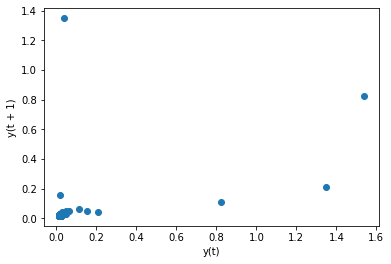

In [71]:
from pandas.plotting import lag_plot
lag_plot(data.LPG)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

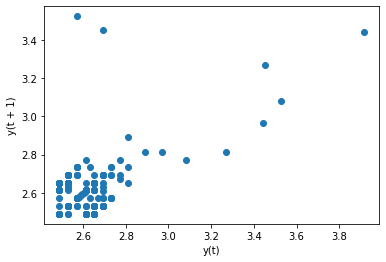

In [72]:

lag_plot(data.CO)

<AxesSubplot:>

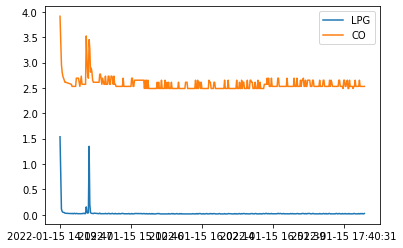

In [73]:

dataD = data.reindex(['LPG', 'CO'], axis=1)
dataD.plot()


In [74]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['LPG'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    LPG   No. Observations:                  430
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 407.294
Date:                Sat, 22 Jan 2022   AIC                           -808.589
Time:                        02:29:46   BIC                           -796.404
Sample:                             0   HQIC                          -803.777
                                - 430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.011     53.024      0.000       0.570       0.613
ma.L1         -0.9671      0.038    -25.719      0.000      -1.041      -0.893
sigma2         0.0087      0.000     24.309      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   4.75   Jarque-Bera (JB):            219195.42
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             3.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       113.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

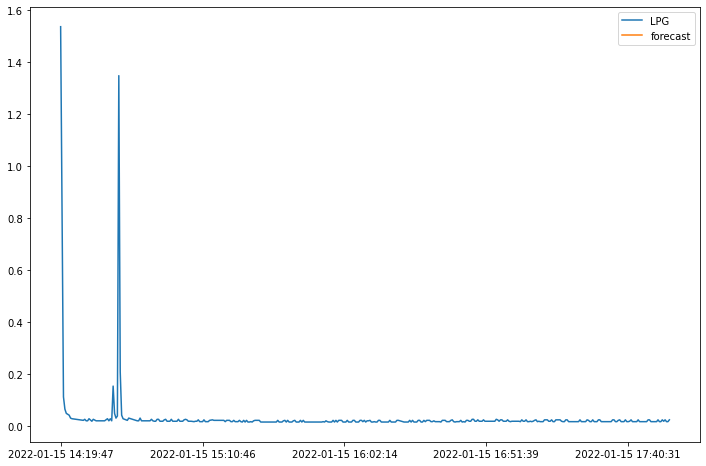

In [75]:
data['forecast']=model_fit.predict(start=400,end=437,dynamic=True)
data[['LPG','forecast']].plot(figsize=(12,8))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarnin

<AxesSubplot:>

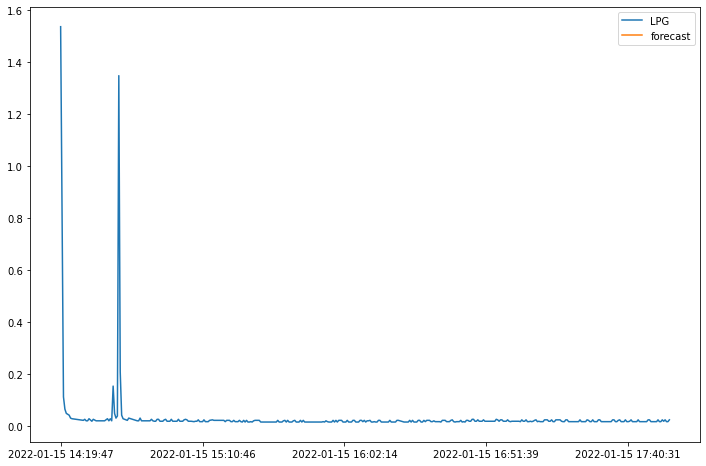

In [76]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['LPG'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=400,end=437,dynamic=True)
data[['LPG','forecast']].plot(figsize=(12,8))

In [77]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['LPG'], trace=True,
suppress_warnings=True)
stepwise_fit

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-801.925, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-774.138, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-789.700, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-796.727, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-775.579, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-806.122, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-803.807, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-807.990, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-804.536, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-796.662, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-808.589, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-797.898, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-790.977, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-806.710, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

predicted=0.022139, expected=0.018380
predicted=0.018795, expected=0.018380
predicted=0.018778, expected=0.023810
predicted=0.022176, expected=0.016820
predicted=0.017847, expected=0.016820
predicted=0.017812, expected=0.023810
predicted=0.022156, expected=0.023810
predicted=0.022213, expected=0.023810
predicted=0.022267, expected=0.023810
predicted=0.022323, expected=0.018380
predicted=0.018972, expected=0.016820
predicted=0.017972, expected=0.016820
predicted=0.017947, expected=0.023810
predicted=0.022278, expected=0.023810
predicted=0.022327, expected=0.016820
predicted=0.017973, expected=0.016820
predicted=0.017962, expected=0.016820
predicted=0.017918, expected=0.016820
predicted=0.017881, expected=0.016820
predicted=0.017844, expected=0.016820
predicted=0.017808, expected=0.016820
predicted=0.017775, expected=0.016820
predicted=0.017744, expected=0.023810
predicted=0.022086, expected=0.016820
predicted=0.017769, expected=0.016820
predicted=0.017736, expected=0.016820
predicted=0.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.017647, expected=0.016820
predicted=0.017615, expected=0.016820
predicted=0.017591, expected=0.016820
predicted=0.017563, expected=0.023810
predicted=0.021915, expected=0.023810
predicted=0.021975, expected=0.016820
predicted=0.017669, expected=0.016820
predicted=0.017638, expected=0.021870
predicted=0.020769, expected=0.023810
predicted=0.022020, expected=0.016820
predicted=0.017708, expected=0.016820
predicted=0.017680, expected=0.016820
predicted=0.017657, expected=0.023810
predicted=0.021999, expected=0.016820
predicted=0.017685, expected=0.016820
predicted=0.017652, expected=0.018380
predicted=0.018602, expected=0.023810
predicted=0.021989, expected=0.016820
predicted=0.017678, expected=0.016820
predicted=0.017651, expected=0.016820
predicted=0.017623, expected=0.016820
predicted=0.017595, expected=0.023810
predicted=0.021948, expected=0.016820
predicted=0.017633, expected=0.016820
predicted=0.017606, expected=0.016820
predicted=0.017580, expected=0.016820
predicted=0.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.021921, expected=0.016820
predicted=0.017611, expected=0.016820
predicted=0.017587, expected=0.016820
predicted=0.017559, expected=0.016820
predicted=0.017536, expected=0.016820
predicted=0.017508, expected=0.023810
predicted=0.021855, expected=0.016820
predicted=0.017551, expected=0.016820
predicted=0.017535, expected=0.023810
predicted=0.021874, expected=0.018380
predicted=0.018543, expected=0.023810
predicted=0.021930, expected=0.016820
predicted=0.017628, expected=0.016820
predicted=0.017600, expected=0.023810
Test MAE: 0.00275
Test MSE: 0.00001
Test RMSE: 0.00353


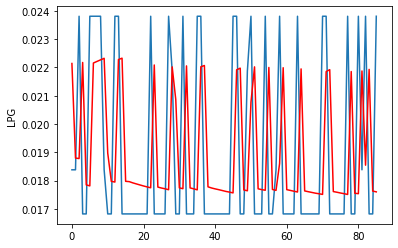

In [78]:
# evaluate an ARIMA model using a walk-forward validation

from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *
from math import sqrt


# print(data)
# data.index = data.index.to_period('T')
# split into train and test sets
X = data['LPG'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
OBS = []
YHAT = []
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	OBS.append(obs)
	YHAT.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts

print('Test MAE: %.5f' % mean_absolute_error(test, predictions))
print('Test MSE: %.5f' % mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % sqrt(mean_squared_error(test, predictions)))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.ylabel('LPG')
pyplot.show()

In [79]:
# # evaluate an ARIMA model using a walk-forward validation

# from matplotlib import pyplot
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import *
# from math import sqrt


# # print(data)
# # data.index = data.index.to_period('T')
# # split into train and test sets
# X = data['CO'].values
# size = int(len(X) * 0.8)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
# 	model = ARIMA(history, order=(1,1,1))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))

# # evaluate forecasts

# print('Test MAE: %.5f' % mean_absolute_error(test, predictions))
# print('Test MSE: %.5f' % mean_squared_error(test, predictions))
# print('Test RMSE: %.5f' % sqrt(mean_squared_error(test, predictions)))
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [80]:
import numpy as np
df = pd.DataFrame(np.stack((YHAT, OBS), axis=1), columns=['predicted', 'expected'])
df

,predicted,expected
0,0.022139,0.01838
1,0.018795,0.01838
2,0.018778,0.02381
3,0.022176,0.01682
4,0.017847,0.01682
...,...,...
81,0.021874,0.01838
82,0.018543,0.02381
83,0.021930,0.01682
84,0.017628,0.01682


<h1> Univariate Time Series Anomaly Detection Using ARIMA Model

In [81]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [82]:
test_col_stationary = {col: test_stationarity(data, col) for col in data[['LPG','CO']] } 
test_col_stationary

{'LPG': 'Stationary', 'CO': 'Stationary'}

In [83]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
preprocessed_data_LPG = differencing(data, 'LPG', 1)
preprocessed_data_CO = differencing(data, 'CO', 1)

In [84]:
print(test_stationarity(preprocessed_data_LPG, series=True))
print(test_stationarity(preprocessed_data_CO, series=True))

Stationary
Stationary


<h1> LSTM <br>


[How to do multivariate time series forecasting using lstm](https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/)


[lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model](https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f)


[MediumSuck](https://shivam-sinha.medium.com/time-series-prediction-using-long-short-term-memory-lstm-networks-forecasting-covid-19-confirmed-59ced70ee83c)

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [86]:
def justOneMinute(data, num_prediction ):
    li=[]
    d = data['date'].dt.date[-1]
    dt = datetime.combine(d, data['date'].dt.time[-1])
    for i in range(num_prediction):    
        li.append(dt + timedelta(minutes=i))
    return li

In [87]:
LPG_data = data['LPG'].values
LPG_data = LPG_data.reshape((-1,1))

CO_data = data['CO'].values
CO_data = CO_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(LPG_data))


LPG_train = LPG_data[:split]
LPG_test = LPG_data[split:]

CO_train = CO_data[:split]
CO_test = CO_data[split:]

date_train = data[:split]
date_test = data[split:]

look_back = 30

train_generator = TimeseriesGenerator(LPG_train, LPG_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(LPG_test, LPG_test, length=look_back, batch_size=1)

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

prediction = model.predict(test_generator)

LPG_data = LPG_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = LPG_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_minutes(num_prediction):
    last_minute = date_train
    prediction_minute = justOneMinute(last_minute, num_prediction+1)
    return prediction_minute

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_minutes(num_prediction)


C:\Users\User\AppData\Local\Temp/ipykernel_21084/1000836034.py:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=num_epochs, verbose=1)


Epoch 1/25
16/16 [==============================] - 1s 10ms/step - loss: 0.0063
Epoch 2/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 3/25
16/16 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 4/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 5/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 6/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 7/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 8/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 9/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 10/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 11/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 12/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 13/25
16/16 [=========================

In [88]:
forecast

array([0.02381   , 0.02613474, 0.02633789, 0.02649519, 0.02661623,
       0.0267094 , 0.02678109, 0.02683624, 0.02687868, 0.0269113 ,
       0.02693642, 0.02695574, 0.02697061, 0.02698204, 0.02699084,
       0.02699761, 0.02700279, 0.02700678, 0.02700987, 0.02701224,
       0.02701407, 0.02701548, 0.02701656, 0.02701737, 0.02701802,
       0.02701851, 0.02701887, 0.02701917, 0.02701937, 0.02701956,
       0.0270197 ])

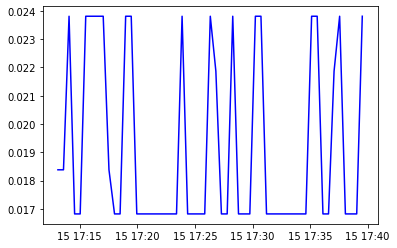

In [89]:
plt.plot(date_test['date'][:55], LPG_test[:55], color = 'blue', label = 'Real data')

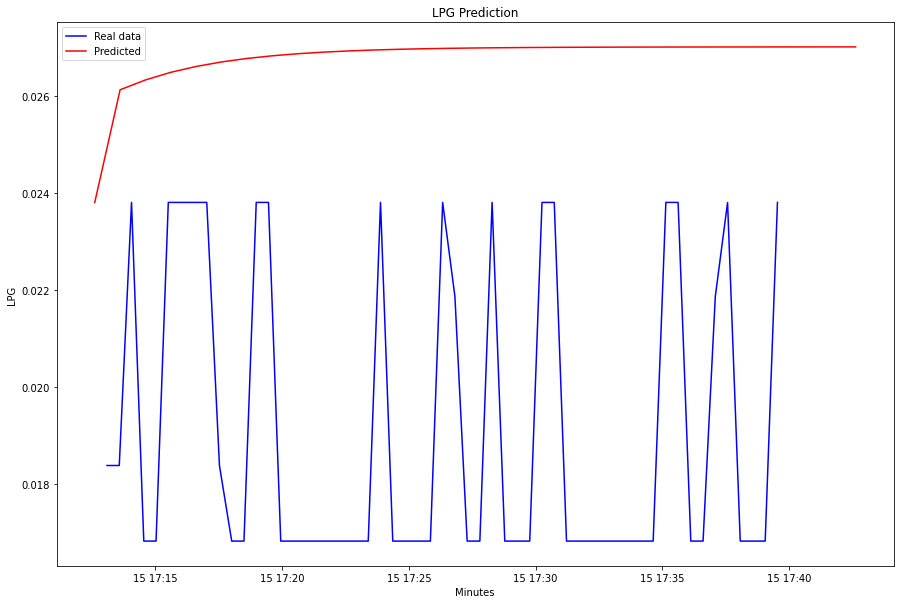

In [90]:
# Visualising the results
plt.figure(figsize=(15,10))
plt.plot(date_test['date'][:55], LPG_test[:55], color = 'blue', label = 'Real data')
plt.plot(forecast_dates, forecast, color = 'red', label = 'Predicted' )
plt.title('LPG Prediction')
plt.xlabel('Minutes')
plt.ylabel('LPG')
plt.legend()
plt.show()

In [91]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(LPG_test[:31], forecast))
print('Mean Absolute Error: %.5f' % mean_absolute_error(LPG_test[:31], forecast))
print('Mean Squared Error: %.5f' % mean_squared_error(LPG_test[:31], forecast))
print('Test RMSE: %.5f' % rmse)

Mean Absolute Error: 0.00763
Mean Squared Error: 0.00007
Test RMSE: 0.00827


<h1> Linear Regressing


In [92]:

import numpy as np 
import matplotlib.pyplot as plt

In [93]:
lpg = data['LPG'].values.reshape(len(data), 1)
co = data['CO'].values

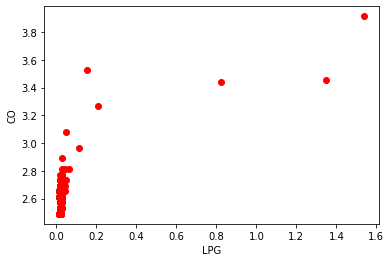

In [94]:
plt.plot(lpg, co , 'ro')
plt.xlabel('LPG')
plt.ylabel('CO')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lpg, co, test_size=0.2, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [97]:
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5374642225879125


In [98]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)


intercept: 2.5463037731415468
slope: [0.84555416]


In [99]:
regressor.predict(X_test)

array([2.55929994, 2.56052599, 2.56327405, 2.55929994, 2.56875958,
       2.56479604, 2.56052599, 2.56052599, 2.56643642, 2.56327405,
       2.56596291, 2.56184506, 2.56184506, 2.55929994, 2.56479604,
       2.55929994, 2.56052599, 2.56052599, 2.55929994, 2.56052599,
       2.56052599, 2.56819517, 2.56184506, 3.24361538, 2.67629081,
       2.56643642, 2.55929994, 2.56479604, 2.56643642, 2.5674384 ,
       2.56479604, 2.56052599, 2.55929994, 2.56184506, 2.55929994,
       2.55929994, 2.55929994, 2.56643642, 2.56643642, 2.56479604,
       2.56819517, 2.56643642, 2.56052599, 2.55929994, 2.56545663,
       2.56184506, 2.56327405, 2.56184506, 2.56643642, 2.56479604,
       2.56184506, 2.56479604, 2.58164794, 2.56479604, 2.56479604,
       2.56052599, 2.56052599, 2.56052599, 2.56327405, 2.56643642,
       2.55929994, 2.56327405, 2.56052599, 2.56052599, 2.56052599,
       2.56327405, 2.55929994, 2.56479604, 2.56643642, 2.55929994,
       2.56479604, 2.56643642, 2.56052599, 2.56184506, 2.55929

In [100]:
def LinearPredictForCO(arr):
    CO_pred = regressor.intercept_ + regressor.coef_ * arr
    return CO_pred

In [101]:
CO_pred = LinearPredictForCO(X_test)
print('predicted response:', CO_pred, sep='\n')

predicted response:
[[2.55929994]
 [2.56052599]
 [2.56327405]
 [2.55929994]
 [2.56875958]
 [2.56479604]
 [2.56052599]
 [2.56052599]
 [2.56643642]
 [2.56327405]
 [2.56596291]
 [2.56184506]
 [2.56184506]
 [2.55929994]
 [2.56479604]
 [2.55929994]
 [2.56052599]
 [2.56052599]
 [2.55929994]
 [2.56052599]
 [2.56052599]
 [2.56819517]
 [2.56184506]
 [3.24361538]
 [2.67629081]
 [2.56643642]
 [2.55929994]
 [2.56479604]
 [2.56643642]
 [2.5674384 ]
 [2.56479604]
 [2.56052599]
 [2.55929994]
 [2.56184506]
 [2.55929994]
 [2.55929994]
 [2.55929994]
 [2.56643642]
 [2.56643642]
 [2.56479604]
 [2.56819517]
 [2.56643642]
 [2.56052599]
 [2.55929994]
 [2.56545663]
 [2.56184506]
 [2.56327405]
 [2.56184506]
 [2.56643642]
 [2.56479604]
 [2.56184506]
 [2.56479604]
 [2.58164794]
 [2.56479604]
 [2.56479604]
 [2.56052599]
 [2.56052599]
 [2.56052599]
 [2.56327405]
 [2.56643642]
 [2.55929994]
 [2.56327405]
 [2.56052599]
 [2.56052599]
 [2.56052599]
 [2.56327405]
 [2.55929994]
 [2.56479604]
 [2.56643642]
 [2.55929994]


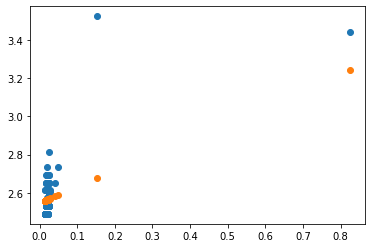

In [102]:
plt.scatter(X_test, y_test )
plt.scatter(X_test, CO_pred)

# plt.plot(X_test, y_test, color = 'blue', label = 'Real data')
# plt.plot(X_test, CO_pred, color = 'red', label = 'Predicted' )

In [103]:
from sklearn.metrics import *

print('Mean Absolute Error: %.5f' % mean_absolute_error(y_test, CO_pred))
print('Mean Squared Error:  %.5f' % mean_squared_error(y_test, CO_pred))
print('Test RMSE: %.5f' % np.sqrt(mean_squared_error(y_test, CO_pred)))


Mean Absolute Error: 0.07577
Mean Squared Error:  0.01440
Test RMSE: 0.12001


In [104]:
ARIMA_Combine = LinearPredictForCO(df['predicted'].values)
ARIMA_Combine

array([2.56502356, 2.56219581, 2.56218154, 2.56505445, 2.56139434,
       2.5613644 , 2.56503785, 2.56508577, 2.56513176, 2.56517891,
       2.56234586, 2.56150024, 2.56147879, 2.56514099, 2.56518275,
       2.56150082, 2.56149164, 2.56145461, 2.56142294, 2.56139212,
       2.56136146, 2.56133352, 2.56130746, 2.5649788 , 2.56132837,
       2.56130016, 2.56127796, 2.56124937, 2.56492262, 2.56394775,
       2.56130534, 2.56128032, 2.56495193, 2.56130408, 2.56127631,
       2.56124555, 2.56492534, 2.56496337, 2.561336  , 2.56130135,
       2.56127482, 2.56125091, 2.56122514, 2.56119853, 2.56117807,
       2.56115432, 2.56483438, 2.56488447, 2.56124377, 2.56121761,
       2.56386494, 2.56492283, 2.56127651, 2.56125285, 2.56123346,
       2.56490495, 2.56125729, 2.56122974, 2.56203314, 2.56489702,
       2.56125147, 2.56122843, 2.56120457, 2.56118089, 2.5648618 ,
       2.5612134 , 2.56119049, 2.56116834, 2.56114619, 2.56112888,
       2.56110916, 2.5647817 , 2.56483922, 2.56119446, 2.56117

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.663519, expected=2.530680
predicted=2.572808, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.558298, expected=2.652870
predicted=2.624526, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.558805, expected=2.530680
predicted=2.549116, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.618086, expected=2.652870
predicted=2.630025, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.637817, expected=2.652870
predicted=2.642964, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.570898, expected=2.530680
predicted=2.557295, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.548301, expected=2.652870
predicted=2.617919, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.629592, expected=2.530680
predicted=2.561979, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.551590, expected=2.530680
predicted=2.544661, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.540026, expected=2.530680
predicted=2.536949, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.534851, expected=2.530680
predicted=2.533473, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inv

predicted=2.532550, expected=2.652870
predicted=2.607348, expected=2.530680
predicted=2.547089, expected=2.530680
predicted=2.541661, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.538036, expected=2.530680
predicted=2.535612, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.609089, expected=2.652870
predicted=2.623559, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.557878, expected=2.530680
predicted=2.549013, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.543070, expected=2.530680
predicted=2.539042, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.536333, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.534505, expected=2.530680
predicted=2.533268, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.607583, expected=2.530680
predicted=2.547199, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.616578, expected=2.612420
predicted=2.603704, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2.556528, expected=2.530680
predicted=2.548143, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.542493, expected=2.530680
predicted=2.538661, expected=2.530680
predicted=2.536080, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

predicted=2.534338, expected=2.530680
predicted=2.533145, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.532350, expected=2.530680
predicted=2.531814, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.606148, expected=2.652870
predicted=2.621316, expected=2.530680
predicted=2.556550, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.548255, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.542666, expected=2.530680
predicted=2.538867, expected=2.489380


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.510980, expected=2.652870
predicted=2.604066, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.619525, expected=2.530680
predicted=2.555289, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.547546, expected=2.612420
predicted=2.592145, expected=2.652870


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.623176, expected=2.489380
predicted=2.532871, expected=2.489380


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.519328, expected=2.652870
predicted=2.609434, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.548809, expected=2.530680
predicted=2.543195, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.539320, expected=2.530680
predicted=2.536649, expected=2.489380


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.509832, expected=2.530680
predicted=2.528454, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.529153, expected=2.652870
predicted=2.603557, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.544943, expected=2.530680
predicted=2.540534, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inv

predicted=2.537496, expected=2.530680
predicted=2.535399, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.533946, expected=2.652870
predicted=2.606547, expected=2.530680
predicted=2.547330, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.542178, expected=2.530680
predicted=2.538641, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.536192, expected=2.530680
predicted=2.534491, expected=2.530680


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=2.533333, expected=2.530680
Test MAE: 0.04487
Test MSE: 0.00383
Test RMSE: 0.06192


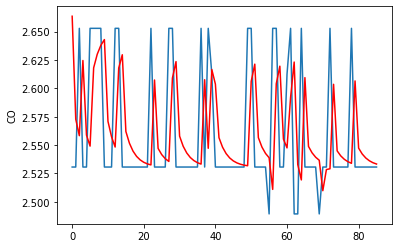

In [105]:
# evaluate an ARIMA model using a walk-forward validation

from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *
from math import sqrt

X = data['CO'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts

print('Test MAE: %.5f' % mean_absolute_error(test, predictions))
print('Test MSE: %.5f' % mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % sqrt(mean_squared_error(test, predictions)))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.ylabel('CO')
pyplot.show()

In [106]:
# evaluate forecasts for CO

print('Test MAE: %.5f' % mean_absolute_error(test, ARIMA_Combine))
print('Test MSE: %.5f' % mean_squared_error(test, ARIMA_Combine))
print('Test RMSE: %.5f' % sqrt(mean_squared_error(test, ARIMA_Combine)))

Test MAE: 0.04745
Test MSE: 0.00288
Test RMSE: 0.05364


In [107]:
CO_data = data['CO'].values
CO_data = CO_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(CO_data))

CO_train = CO_data[:split]
CO_test = CO_data[split:]

date_train = data[:split]
date_test = data[split:]

look_back = 30

train_generator = TimeseriesGenerator(CO_train, CO_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(CO_test, CO_test, length=look_back, batch_size=1)

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

prediction = model.predict(test_generator)

# close_train = close_train.reshape((-1))
# close_test = close_test.reshape((-1))
# prediction = prediction.reshape((-1))

CO_data = CO_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = CO_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_minutes(num_prediction):
    last_minute = date_train
    # prediction_minute = pd.date_range(last_minute, periods=num_prediction+1).tolist()
    prediction_minute = justOneMinute(last_minute, num_prediction+1)
    return prediction_minute

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_minutes(num_prediction)


Epoch 1/25


C:\Users\User\AppData\Local\Temp/ipykernel_21084/696707495.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=num_epochs, verbose=1)


16/16 [==============================] - 1s 10ms/step - loss: 16.1440
Epoch 2/25
16/16 [==============================] - 0s 9ms/step - loss: 7.5675
Epoch 3/25
16/16 [==============================] - 0s 8ms/step - loss: 0.7536
Epoch 4/25
16/16 [==============================] - 0s 9ms/step - loss: 0.1303
Epoch 5/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0470
Epoch 6/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0307
Epoch 7/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 8/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 9/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0288
Epoch 10/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0396
Epoch 11/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0388
Epoch 12/25
16/16 [==============================] - 0s 11ms/step - loss: 0.0336
Epoch 13/25
16/16 [==============================] - 0s

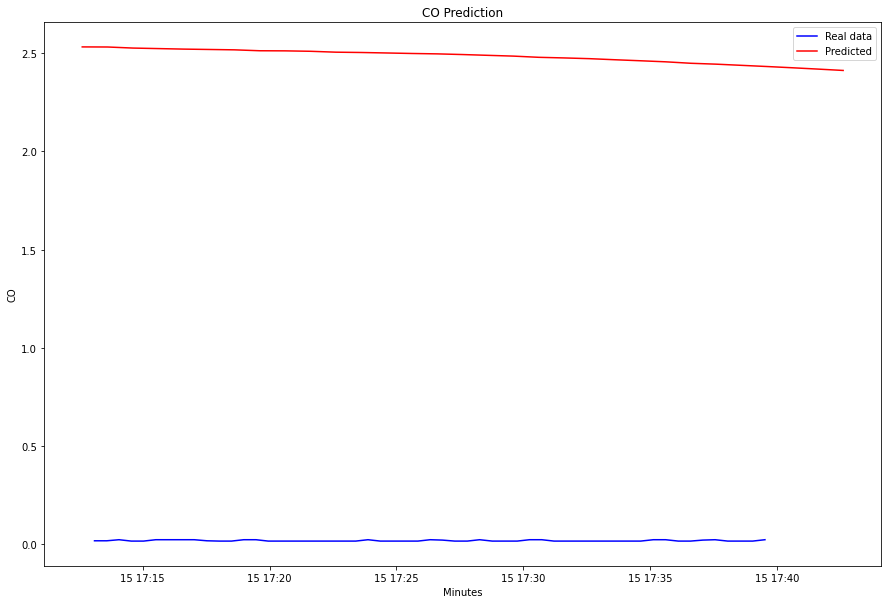

In [108]:
# Visualising the results
plt.figure(figsize=(15,10))
plt.plot(date_test['date'][:55], LPG_test[:55], color = 'blue', label = 'Real data')
plt.plot(forecast_dates, forecast, color = 'red', label = 'Predicted' )
plt.title('CO Prediction')
plt.xlabel('Minutes')
plt.ylabel('CO')
plt.legend()
plt.show()

In [109]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(CO_test[:31], forecast))
print('Mean Absolute Error: %.5f' % mean_absolute_error(CO_test[:31], forecast))
print('Mean Squared Error: %.5f' % mean_squared_error(CO_test[:31], forecast))
print('Test RMSE: %.5f' % rmse)

Mean Absolute Error: 0.08726
Mean Squared Error: 0.01158
Test RMSE: 0.10762


In [110]:
# evaluate forecasts
LSTM_Combine = LinearPredictForCO(forecast)
print('CO predicted data \n', LSTM_Combine)

print('Test MAE: %.5f' % mean_absolute_error(CO_test[:31], LSTM_Combine))
print('Test MSE: %.5f' % mean_squared_error(CO_test[:31], LSTM_Combine))
print('Test RMSE: %.5f' % sqrt(mean_squared_error(CO_test[:31], LSTM_Combine)))

CO predicted data 
 [4.68613078 4.68574367 4.68114789 4.67891017 4.67666117 4.67509961
 4.67353664 4.6695904  4.66913278 4.66730067 4.66346229 4.6621124
 4.66004524 4.65786397 4.65616291 4.6532811  4.6498705  4.64655042
 4.64137404 4.63873273 4.63555941 4.63092009 4.62658336 4.62201641
 4.6157115  4.61187755 4.60681003 4.60176268 4.59638632 4.59074748
 4.5848623 ]
Test MAE: 2.07558
Test MSE: 4.31173
Test RMSE: 2.07647
